<a href="https://colab.research.google.com/github/Debabrat1/Machine_Learning_Codes/blob/main/ML_End_sem_Debabrat_Sarma_2002007(M_Tech_ECE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part A. Is there a relationship between the daily minimum and maximum temperature? Can you predict the maximum temperature given the minimum temperature?

1. Use the gradiant descent technique (no built in code for gradiant descent) to implement the linear regression. Compare the outcome with built-in linear regression module.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1.3919432911762424 0.4402671839752879


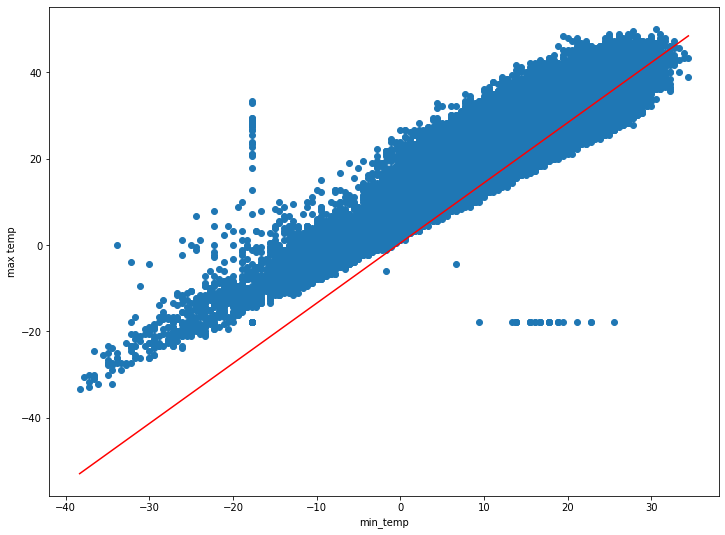

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)


# Preprocessing Input data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weather.csv') 
X = data.iloc[:, 5]
Y = data.iloc[:, 4]

# Building the model
theta1 = 0
theta0 = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = theta1*X + theta0 # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    theta1 = theta1- L * D_m  # Update m
    theta0 = theta0 - L * D_c  # Update c

print (theta1, theta0)




# Making predictions
Y_pred = theta1*X + theta0

plt.scatter(X, Y)
plt.xlabel('min_temp')
plt.ylabel('max temp') 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

Using built in Linear_Regression 

In [ ]:
# implement Linear Regression on dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weather.csv')
#print(weather)

weatherN = weather.copy()
#print(weatherN)
df = weatherN[["MaxTemp","MinTemp"]]
print(df)

          MaxTemp    MinTemp
0       25.555556  22.222222
1       28.888889  21.666667
2       26.111111  22.222222
3       26.666667  22.222222
4       26.666667  21.666667
...           ...        ...
119035  28.333333  18.333333
119036  29.444444  18.333333
119037  28.333333  18.333333
119038  28.333333  18.333333
119039  29.444444  17.222222

[119040 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.describe()

,MaxTemp,MinTemp
count,119040.000000,119040.000000
mean,27.045111,17.789511
std,8.717817,8.334572
min,-33.333333,-38.333333
25%,25.555556,15.000000
50%,29.444444,21.111111
75%,31.666667,23.333333
max,50.000000,34.444444


In [ ]:
X = df["MinTemp"]
x =X.to_numpy()
x =x.reshape(-1,1)
print(x)

[[22.22222222]
 [21.66666667]
 [22.22222222]
 ...
 [18.33333333]
 [18.33333333]
 [17.22222222]]


In [ ]:
Y = df["MaxTemp"]
y =Y.to_numpy()
print(y)

[25.55555556 28.88888889 26.11111111 ... 28.33333333 28.33333333
 29.44444444]


In [ ]:
# importing linear regression using sklearn

from sklearn.linear_model import LinearRegression
algo = LinearRegression().fit(x,y)
algo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("coefficient of determination",algo.score(x, y))
print(algo.coef_)
print(algo.intercept_)


coefficient of determination 0.7715582862315506
[0.91877423]
10.70056703746156


In [ ]:
y_predict = algo.predict(x)
print(y_predict)

[31.11777216 30.60734204 31.11777216 ... 27.54476126 27.54476126
 26.52390101]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


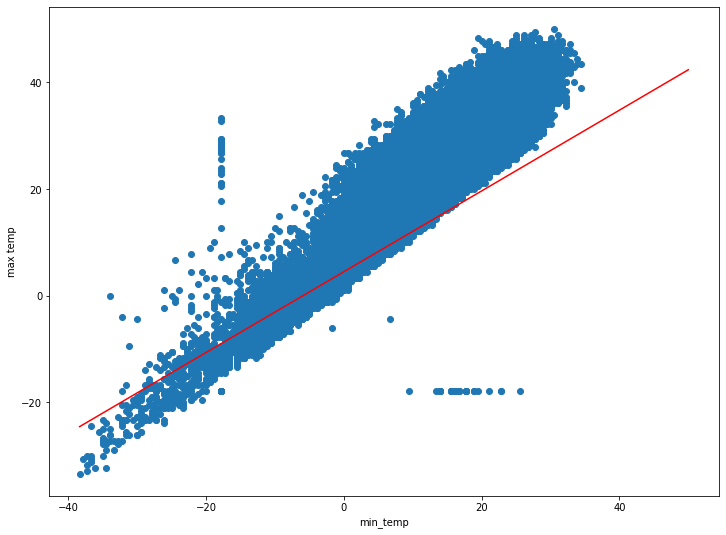

In [ ]:


plt.scatter(x, y)
plt.xlabel('min_temp')
plt.ylabel('max temp') 
plt.plot([min(x), max(y)], [min(y_predict), max(y_predict)], color='red')  # regression line
plt.show()

Part B. The Case require to develop a customer segmentation to define marketing strategy. The sapmle dataset summarizes the usage behaviour of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioural veriables.( While training ignore the customer id Cust ID)

Q 1. Implement the clustering approach
    (a) Initialize the cluster number from 2 to 10 and compare the results

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CC GENERAL.csv')
print(df,type(df))


     CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
0     C10001    40.900749  ...          0.000000      12
1     C10002  3202.467416  ...          0.222222      12
2     C10003  2495.148862  ...          0.000000      12
3     C10004  1666.670542  ...          0.000000      12
4     C10005   817.714335  ...          0.000000      12
...      ...          ...  ...               ...     ...
8945  C19186    28.493517  ...          0.500000       6
8946  C19187    19.183215  ...          0.000000       6
8947  C19188    23.398673  ...          0.250000       6
8948  C19189    13.457564  ...          0.250000       6
8949  C19190   372.708075  ...          0.000000       6

[8950 rows x 18 columns] <class 'pandas.core.frame.DataFrame'>


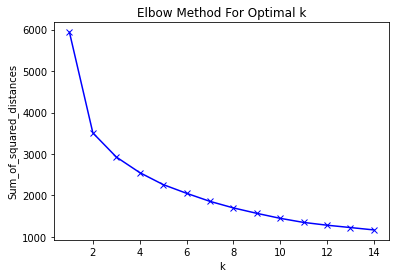

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,BALANCE,PURCHASES,PURCHASES_FREQUENCY,CREDIT_LIMIT,ONEOFF_PURCHASES_FREQUENCY,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,PAYMENTS
PREDICTED_CLUSTER,,,,,,,,
0,0.008697,0.007055,0.160948,0.133629,0.073079,0.002656,0.268398,0.032777
1,0.121154,0.090392,0.973607,0.244215,0.803933,0.010289,0.221812,0.079736
2,0.123316,0.003147,0.071102,0.141185,0.055570,0.014216,0.020536,0.029812
3,0.068851,0.023151,0.946202,0.121323,0.087066,0.014200,0.061945,0.027208
4,0.006536,0.022963,0.862737,0.135101,0.097612,0.002251,0.813015,0.023455
5,0.080853,0.045363,0.860742,0.197321,0.836844,0.008996,0.301056,0.047681
6,0.089313,0.018569,0.531942,0.152739,0.160247,0.014030,0.069644,0.028500
7,0.062364,0.006282,0.152993,0.097713,0.098011,0.004746,0.051367,0.015617


In [ ]:


df.apply(lambda x: sum(x.isnull()/len(df)))
trainClean = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
cols_to_drop = 'CUST_ID'
trainClean = trainClean.drop([cols_to_drop], axis=1)
x = trainClean.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
trainClean = pd.DataFrame(x_scaled,columns=trainClean.columns)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(trainClean)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
np.random.seed(0)
msk = np.random.rand(len(trainClean)) < 0.8
train = trainClean[msk]
test = trainClean[~msk]
X = np.array(train)
X_test = np.array(test)
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)
y_k = kmeans.predict(X_test)
test['PREDICTED_CLUSTER'] = y_k
train_summary = test.groupby(by='PREDICTED_CLUSTER').mean()
train_summary = train_summary[['BALANCE', 'PURCHASES', 
                               'PURCHASES_FREQUENCY','CREDIT_LIMIT', 
                               'ONEOFF_PURCHASES_FREQUENCY', 
                              'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT', 
                               'PAYMENTS']]
train_summary